## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Mounting the Drive and Loading the csv files





In [3]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [103]:
# Import pandas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot

In [5]:
# Loading two csv files as path1 and path2
path1 = '/content/drive/MyDrive/AlmaBetter/Project on play store/csv files/'
path2 = '/content/drive/MyDrive/AlmaBetter/Project on play store/csv files/'

In [6]:
play_s_df = pd.read_csv(path1 + 'Play Store Data.csv')
user_r_df = pd.read_csv(path2 + 'User Reviews.csv')

# **1. INTRODUCTION TO DATA**
---
Firstly let's get to know data. While I was analyzing the data, I used Pandas library.

1. info(): It informs about data columns and data types.
2. head(): It returns the first five data.
3. tail(): It returns the last five data.
4. columns : It returns data columns
5. describe : To get some basic statistical details
5. shape : It gives number of rows and columns in a tuble.

In [7]:
play_s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
play_s_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
play_s_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [10]:
play_s_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
play_s_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
play_s_df.shape

(10841, 13)

# **Cleaning of Data**
---



In [13]:
play_s_df.App.nunique()

9660

# **Remove** **Duplicates** -
### There is always a possibility that duplicates may exist within the dataframe and eliminating those duplicates is major task while analyzing the data. This can be done by drop_duplicates method.

In [14]:
# Firstly, Showing the existence of duplicates using app and counting the values of duplicate apps
duplicate =play_s_df.groupby(['App']).agg({'Category': 'count'}).reset_index()
duplicate = duplicate.sort_values(by=['Category'], ascending=False)
duplicate.head(5)

,App,Category
7302,ROBLOX,9
1934,"CBS Sports App - Scores, News, Stats & Watch Live",8
2364,Candy Crush Saga,7
3504,Duolingo: Learn Languages Free,7
101,8 Ball Pool,7


In [15]:
# Total entries with duplicates
before = len(play_s_df.index)
print('Total entries with duplicates were '+ (str(before)))

Total entries with duplicates were 10841


In [16]:
# Sorting the valuse with descending order such as to retain the row which has maximum number of reviews in duplicates
play_s_df.sort_values('Reviews',ascending=False,inplace=True)

In [17]:
# Drop duplicates with a value in a specific column.

play_s_df.drop_duplicates(subset=['App','Category'],inplace=True)

after = len(play_s_df.index)
print('Total entries after duplicates were dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')

Total entries after duplicates were dropped are 9745
Total 1096 entries were dropped.


In [18]:
# Shape of dataframe after removing duplicates
play_s_df.shape

(9745, 13)

#**Column: Rating**

In [19]:
# Changing the column names to one word
play_s_df.rename(columns={'Last Updated':'Last_Updated', 'Content Rating':'Content_Rating', 'Current Ver':'Current_Version', 'Android Ver':'Android_Version'}, inplace = True)

In [20]:
# Finding the sum of null values for each dataseries throughout the Dataframe
play_s_df.isnull().sum()

App                   0
Category              0
Rating             1464
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content_Rating        1
Genres                0
Last_Updated          0
Current_Version       8
Android_Version       3
dtype: int64

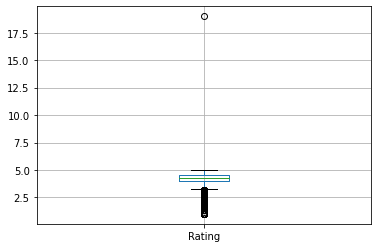

In [21]:
# Plotting Box plot to check outliers exists or not!
play_s_df.boxplot(column='Rating');

### From above we observed that there is one outlier which affects our distribution in a dataframe so we will remove it.

In [22]:
# Checking the outliers 
play_s_df[play_s_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
# Removing the outliers from column because it increases variability in our data.
play_s_df.drop([10472],inplace=True)

In [24]:
# Checking the dropped outliers with method of slicing
play_s_df[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version


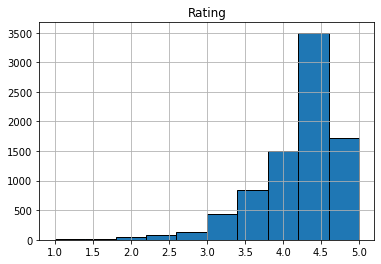

In [25]:
play_s_df.hist(column='Rating',edgecolor='black');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



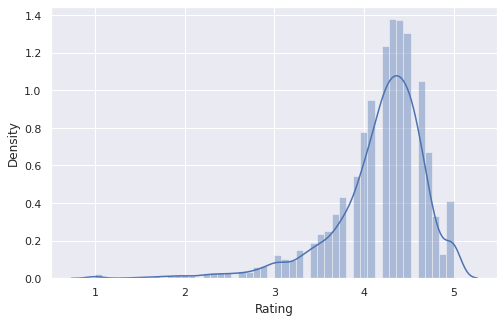

In [26]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(play_s_df.Rating);

### We recognized here from previous graph that our distribution appears as left skewed in direction.

In [27]:
''' Filling null values with median value because as we can see from the above distplot appeared as skewed to left. 
So the median is usually preferred in measures of central tendency when your data set is skewed '''

play_s_df['Rating'] = play_s_df['Rating'].fillna(play_s_df['Rating'].median())

In [28]:
# Counting the number of null values in Rating column
play_s_df.Rating.isnull().sum()

0

#**Column: Last_Updated**

In [29]:
# Converting datetime format for Last_Updated column
# Importing datetime modules
from datetime import datetime
from datetime import date

In [30]:
# Look into datatype for Last_Updated 
play_s_df['Last_Updated'].dtype

dtype('O')

In [31]:
# We examined that 'O' is for object dtype so we'll convert it into datetime format
play_s_df['Last_Updated'] = pd.to_datetime(play_s_df['Last_Updated'],errors='coerce')

#**Column: Reviews**

In [32]:
#Checking null values
play_s_df.Reviews.isnull().sum()

0

In [33]:
# Converting the datatype of Reviews into numeric datatype
play_s_df['Reviews'] = pd.to_numeric(play_s_df['Reviews'])

In [34]:
# Checking the changes in a datatype of Reviews
play_s_df.Reviews.dtype

dtype('int64')

#**Column: Type**

In [35]:
# Checking the null values in Type Column
play_s_df['Type'].isnull().sum()

1

In [36]:
# Checking the mode of Type Column
play_s_df['Type'].mode()

0    Free
dtype: object

In [37]:
# Display the row which have null values in Type Column. Apart from Free and Paid Type, this column also has 1 NaN, which is displayed below:
play_s_df[play_s_df.Type.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [38]:
# We can see from above row that it contains one null value so we can replace it by mode of Type column
# Because displayed row has a Price equal to 0, so from this we can conclude finally to change the value into 'Free'
play_s_df['Type'] = play_s_df['Type'].fillna('Free')

In [39]:
# Checking the null values in Type Column
play_s_df.Type.isnull().sum()

0

#**Column: Size**

In [40]:
# Checking null values 
play_s_df[play_s_df['Size'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version


In [41]:
# It returns a scalar value which is the count of all the unique values in the index
play_s_df.Size.nunique()

461

In [42]:
# Examining the Unique values
play_s_df.Size.unique()[:7]

array(['31M', '91k', '18M', '33M', '22M', 'Varies with device', '5.5M'],
      dtype=object)

### Above array of values shows that there is a different types values including such as '31M', 'Varies with device', '91k', etc.

### Amidst all the apps in this dataset, none has its size reach 1GB. All the values we have to parse either end with ‘M’ (Megabyte) or ‘k’ (kilobyte). So here we parsed the values in only MB(megabyte) as it is better way of representing the size in a dataset.

In [43]:
# Expressly Transforming the Variable Size value into proper float value
play_s_df['Size'] = play_s_df.Size.apply(lambda x: str(x).replace("Varies with device",'NaN') if "Varies with device" in str(x) else x)
play_s_df['Size'] = play_s_df.Size.apply(lambda x: str(x).replace("M","") if "M" in str(x) else x)
play_s_df['Size'] = play_s_df.Size.apply(lambda x: float(str(x).replace("k",""))/1024 if "k" in str(x) else x) # 1 MB = 1024kb
play_s_df['Size'] = play_s_df['Size'].astype(float)
play_s_df['Size'] = play_s_df['Size'].fillna(play_s_df['Size'].mean())
play_s_df['Size'].dtype

dtype('float64')

In [44]:
play_s_df['Installs1']=play_s_df.Installs

#**Column: Installs**

In [45]:
# Checking unique values in Column
play_s_df.Installs.unique()

array(['1,000,000+', '100,000+', '500,000+', '50,000+', '10,000,000+',
       '5,000,000+', '10,000+', '50,000,000+', '100,000,000+', '5,000+',
       '1,000+', '1,000,000,000+', '500+', '10+', '100+', '50+',
       '500,000,000+', '5+', '1+', '0+', '0'], dtype=object)

### Data type of Installs is object. We make similar procedures, which constructed in the 'Size'.

In [46]:
# Now Transforming number of Installs into proper integer number 
play_s_df['Installs'] = play_s_df.Installs.apply(lambda x: str(x).replace("+","") if "+" in str(x) else x)
play_s_df['Installs'] = play_s_df.Installs.apply(lambda x: str(x).replace(",","") if "," in str(x) else x)
play_s_df['Installs'] = play_s_df.Installs.astype(int)
play_s_df['Installs'].dtype

dtype('int64')

# **Column: Price**

In [47]:
# Observing the unique values in Column
play_s_df.Price.min(),play_s_df.Price.max()

('$0.99', '0')

### As we look out for unique values that will be like this lead: ‘0’ if it is free, else a '$' sign followed by a floating-point number. Datatype of Price is object. We made similar code as in Installs to get appropriate dtype. 

In [48]:
play_s_df['Price'] = play_s_df['Price'].apply(lambda x: str(x).replace("$","") if "$" in str(x) else x)
play_s_df['Price'] = play_s_df['Price'].astype(float)
play_s_df['Price'].dtype

dtype('float64')

# **Column: Current_Version**

In [49]:
# Observing the null values in Current_Version Column
play_s_df.Current_Version.isnull().sum()

8

In [50]:
# Displaying NaN values which we have to fill with mode of Current_Version
play_s_df[play_s_df.Current_Version.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Installs1
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,0.642578,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up,"1,000+"
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.700000,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up,"5,000+"
7407,Calculate My IQ,FAMILY,4.3,44,7.200000,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up,"10,000+"
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.700000,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up,"500,000+"
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,0.010742,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up,"1,000,000+"
7333,Dots puzzle,FAMILY,4.0,179,14.000000,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up,"50,000+"
7730,UFO-CQ,TOOLS,4.3,1,0.231445,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up,10+
6803,BT Master,FAMILY,4.3,0,0.216797,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up,100+


In [51]:
# # Filling NaN values with mode of Current_Version
play_s_df['Current_Version'].fillna(str(play_s_df['Current_Version'].mode().values[0]), inplace=True)

# **Column: Android_Version**

In [52]:
# Observing the null values in Android_Version Column
play_s_df.Android_Version.isnull().sum()

2

In [53]:
# Displaying NaN values which we have to fill with mode of Current_Version
play_s_df[play_s_df.Android_Version.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Installs1
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11.0,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN,"1,000+"
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN,"10,000+"


In [54]:
# # Filling NaN values with mode of Android_Version and replacing 'and up' with empty quotes
play_s_df['Android_Version'].fillna(str(play_s_df['Android_Version'].mode().values[0]), inplace=True)


In [55]:
play_s_df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content_Rating     0
Genres             0
Last_Updated       0
Current_Version    0
Android_Version    0
Installs1          0
dtype: int64

# **User Review** 

In [56]:
user_r_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [57]:
user_r_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [58]:
user_r_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [59]:
user_r_df.shape

(64295, 5)

In [60]:
user_r_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# **Merging two dataset**
## While functioning with CSV files during data analysis, there are two files named as User Reviews and Play Store Data in which we have to commit the data visualization. For that there’s a need to merge these two files into a single data frame. Favorably, the Pandas library contribute us with various methods such as merge, concat, and join to make this feasible. 



In [61]:
# Defining variable to two merged dataset as merged_df
merged_df = play_s_df.merge(user_r_df, on='App')

In [62]:
merged_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Installs1,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+",NaN,NaN,NaN,NaN
1,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+",NaN,NaN,NaN,NaN
2,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+",NaN,NaN,NaN,NaN
3,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+",NaN,NaN,NaN,NaN
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+",NaN,NaN,NaN,NaN


In [63]:
# Checking the null values in merged dataset
merged_df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content_Rating                0
Genres                        0
Last_Updated                  0
Current_Version               0
Android_Version               0
Installs1                     0
Translated_Review         27480
Sentiment                 27475
Sentiment_Polarity        27475
Sentiment_Subjectivity    27475
dtype: int64

In [64]:
# Eliminating the null values as this affect the performance and accuracy of our data analysis. 
merged_df.dropna(inplace=True)

In [65]:
# Acquiring details for merged dataset after removing all null values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38494 entries, 6 to 65971
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     38494 non-null  object        
 1   Category                38494 non-null  object        
 2   Rating                  38494 non-null  float64       
 3   Reviews                 38494 non-null  int64         
 4   Size                    38494 non-null  float64       
 5   Installs                38494 non-null  int64         
 6   Type                    38494 non-null  object        
 7   Price                   38494 non-null  float64       
 8   Content_Rating          38494 non-null  object        
 9   Genres                  38494 non-null  object        
 10  Last_Updated            38494 non-null  datetime64[ns]
 11  Current_Version         38494 non-null  object        
 12  Android_Version         38494 non-null  object

In [66]:
# Computing some basic statistical details like mean, max, std, IQR,etc
merged_df.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,38494.000000,3.849400e+04,38494.000000,3.849400e+04,38494.000000,38494.000000,38494.000000
mean,4.303788,1.765131e+06,27.486221,4.698885e+07,0.101921,0.176653,0.494367
std,0.298290,6.180830e+06,22.865211,1.453509e+08,1.258622,0.347698,0.254838
min,2.600000,1.140000e+02,0.008301,1.000000e+03,0.000000,-1.000000,0.000000
25%,4.200000,1.179800e+04,14.000000,1.000000e+06,0.000000,0.000000,0.366667
50%,4.300000,6.941700e+04,20.524013,5.000000e+06,0.000000,0.148052,0.513333
75%,4.500000,8.071550e+05,31.000000,1.000000e+07,0.000000,0.400000,0.650000
max,4.900000,7.815831e+07,99.000000,1.000000e+09,29.990000,1.000000,1.000000


# **Exploratory Analysis and Visualization**

# 1- Correlation Map
### Let us find correlation between columns in a dataframe. Correlation map is used to detect the pairwise correlation between all quantitative measurables in a dataset. 

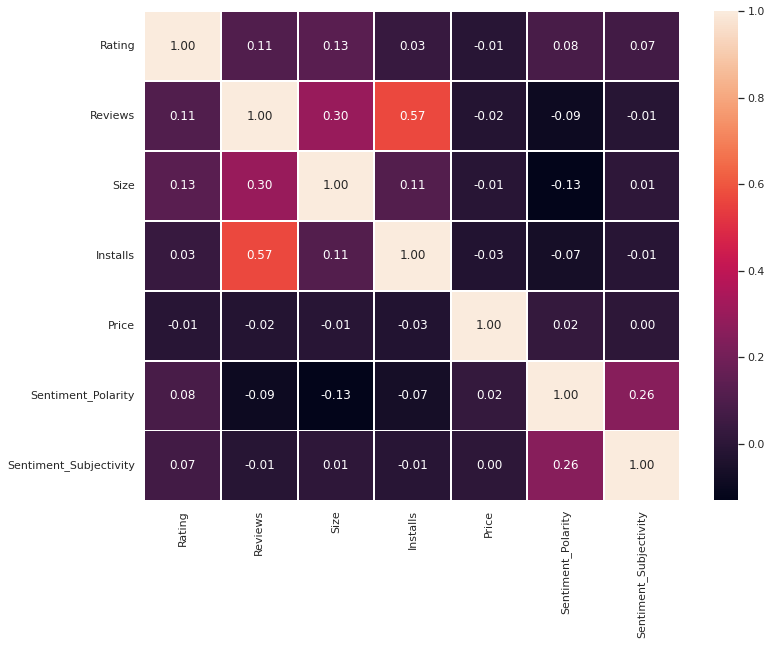

In [67]:
# Correlation map
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(merged_df.corr(), annot=True, linewidths=.8, fmt= '.2f',ax=ax)
plt.show()

# We can determine from above that **Installs** and **Reviews** are Highly Positively Correlated.


## 2 - Most Downloaded apps in Play Store Dataset





In [68]:
pd.DatetimeIndex(merged_df['Last_Updated']).year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='Last_Updated', length=38494)

In [69]:
merged_df['Year'] =  pd.DatetimeIndex(merged_df['Last_Updated']).year

In [70]:
# Counting the Apps within in each Category over all Columns and saving it in Category_df dataframe

Category_df=merged_df.groupby(['Category','Year']).count()
Category_df.reset_index(inplace=True)
Category_df = Category_df[['Category', 'Installs','Year']]
Category_df.head()

,Category,Installs,Year
0,ART_AND_DESIGN,128,2017
1,ART_AND_DESIGN,254,2018
2,AUTO_AND_VEHICLES,289,2018
3,BEAUTY,65,2017
4,BEAUTY,273,2018


In [71]:
# 
fig = px.bar(Category_df, x='Installs', y='Year',color='Category',orientation='h',barmode='relative',text='Installs',
             title='Number of Installs for each Category in a Year',height=500,)
fig.show()

In [72]:
# data = px.data.gapminder()
fig = px.bar(Category_df, x="Category", y="Installs", color='Year',title="Category vs Apps")
fig.show()

# ----->>>>

In [73]:
play_s_df.Installs.unique()

array([   1000000,     100000,     500000,      50000,   10000000,
          5000000,      10000,   50000000,  100000000,       5000,
             1000, 1000000000,        500,         10,        100,
               50,  500000000,          5,          1,          0])

In [74]:
n = play_s_df.groupby(play_s_df.Installs1,as_index=True).head()
n=n.sort_values('Installs')
n

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Installs1
9148,Command & Conquer: Rivals,FAMILY,4.3,0,20.524013,0,Free,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,0
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.3,0,56.000000,0,Paid,3.99,Everyone,Travel & Local,2017-01-22,1.1.1,4.1 and up,0+
8871,Test Application DT 02,ART_AND_DESIGN,4.3,0,1.200000,0,Free,0.00,Everyone,Art & Design,2017-03-14,4.0,4.2 and up,0+
7434,Pekalongan CJ,SOCIAL,4.3,0,5.900000,0,Free,0.00,Teen,Social,2018-07-21,0.0.1,4.4 and up,0+
5307,Ak Parti Yardım Toplama,SOCIAL,4.3,0,8.700000,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up,0+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,20.524013,1000000000,Free,0.00,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device,"1,000,000,000+"
3234,Google,TOOLS,4.4,8033493,20.524013,1000000000,Free,0.00,Everyone,Tools,2018-08-03,Varies with device,Varies with device,"1,000,000,000+"
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13.000000,1000000000,Free,0.00,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,"1,000,000,000+"
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,20.524013,1000000000,Free,0.00,Everyone,Communication,2018-08-01,Varies with device,Varies with device,"1,000,000,000+"


In [75]:
n.Size.max()

99.0

In [76]:
fig = px.bar(n, x='Installs1', y='Rating',color='Type',orientation='v',barmode='relative',text='Rating',
             title='Number of Installs for each Category in a Year',height=700,)

fig.show()

In [77]:
fig = px.pie(n, values='Installs', names='Size', title='Population of European continent')
fig.show()


In [ ]:
new= play_s_df.groupby('Rating')['Installs'].max().reset_index()
new

In [79]:
fig=px.bar(new, y='Installs',x='Rating',color='Installs',text='Rating')
fig.show()

## We can conclude from above that Highest number of Installs found in **Game** Category and then followed by **Family,** **Health and Fitness,** **Dating,** **Sports**.

# ------->>>>>>>>>

In [107]:
m = play_s_df.groupby(play_s_df.Installs1,as_index=True).head()
m

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Installs1
2989,GollerCepte Live Score,SPORTS,4.2,9992,31.000000,1000000,Free,0.00,Everyone,Sports,2018-05-23,6.5,4.1 and up,"1,000,000+"
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,0.088867,100000,Free,0.00,Everyone,Tools,2013-12-17,3.2,2.2 and up,"100,000+"
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18.000000,1000000,Free,0.00,Everyone,Shopping,2018-01-22,1.4,4.3 and up,"1,000,000+"
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33.000000,1000000,Free,0.00,Everyone,Sports,2018-06-05,7.1,5.0 and up,"1,000,000+"
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.000000,500000,Free,0.00,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,Ak Parti Yardım Toplama,SOCIAL,4.3,0,8.700000,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up,0+
8871,Test Application DT 02,ART_AND_DESIGN,4.3,0,1.200000,0,Free,0.00,Everyone,Art & Design,2017-03-14,4.0,4.2 and up,0+
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.3,0,56.000000,0,Paid,3.99,Everyone,Travel & Local,2017-01-22,1.1.1,4.1 and up,0+
7434,Pekalongan CJ,SOCIAL,4.3,0,5.900000,0,Free,0.00,Teen,Social,2018-07-21,0.0.1,4.4 and up,0+


In [108]:
fig=px.bar(m, y='Installs',x='Content_Rating',color='Category',text='Installs',orientation='v',barmode='relative',
             title='Number of Installs for each Category in a Year',height=700,)
fig.show()

# 3 - Average rating per category

In [80]:
# Computing mean over Rating column over each apps of Category
# Let us make a dataframe storing the above intution named as mean_rating_df 
mean_rating_df=merged_df.groupby(merged_df.Category).mean()
mean_rating_df.reset_index(inplace=True)
mean_rating_df =mean_rating_df.sort_values(by='Rating',ascending=False)
mean_rating_df = mean_rating_df[['Category','Rating']]
mean_rating_df.head(10)

,Category,Rating
1,AUTO_AND_VEHICLES,4.577855
14,GAME,4.441015
15,HEALTH_AND_FITNESS,4.392308
13,FOOD_AND_DRINK,4.385266
11,FAMILY,4.366015
25,PRODUCTIVITY,4.365619
3,BOOKS_AND_REFERENCE,4.362366
23,PERSONALIZATION,4.337886
10,EVENTS,4.336076
24,PHOTOGRAPHY,4.327041


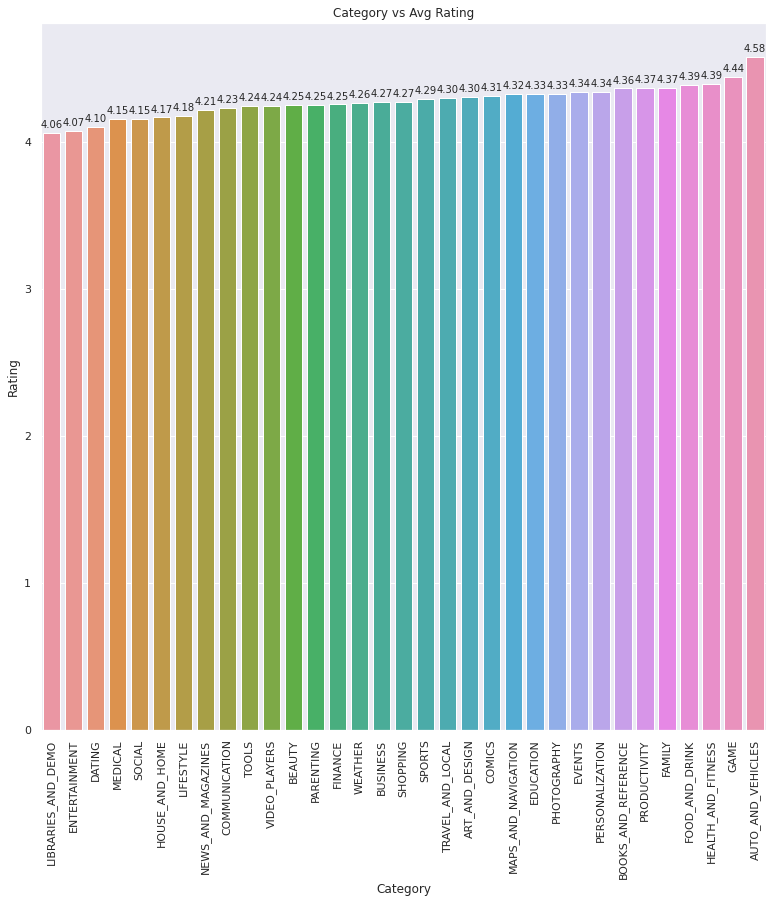

In [81]:
fig, ax = plt.subplots(figsize=(13,13))
mean_rating_df=mean_rating_df.sort_values(by="Rating",ascending=True)
# add the plot
ax1=sns.barplot(x=mean_rating_df.Category, y=mean_rating_df.Rating, data=mean_rating_df, capsize=0.2, ax=ax)
# add the annotation
for bar in ax1.patches:
   ax1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90)
ax.set(xlabel='Category',title="Category vs Avg Rating")
plt.show()

###  We can see from the Category vs Avg Rating graph that **Auto and Vehicles** Category have average number of ratings with 4.58 as more and **Libraries and Demo** Category with 4.06 as less.

# 4 - Top 10 Categories

In [82]:
Category = merged_df.groupby('Category')['App'].count().reset_index().rename(columns={'App':'Count of Apps'})
Category = Category.sort_values(by=['Count of Apps'], ascending=False)
Category.set_index('Category', inplace= True)
Category.head()

,Count of Apps
Category,
GAME,6678
FAMILY,4349
HEALTH_AND_FITNESS,2249
DATING,1715
SPORTS,1701


In [83]:
# Top 5 Categories 
cat_head= Category.head(5)
top_5_cat = merged_df[merged_df['Category'].isin(cat_head.index)]

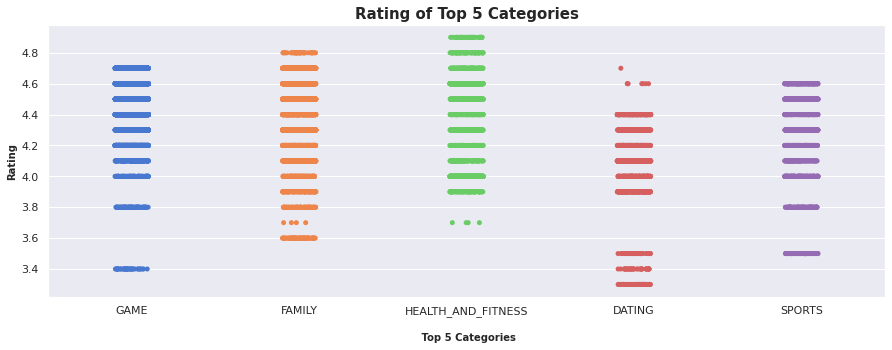

In [84]:
# Representing stripplot with Category on x-axis and Rating on y-axis
fig2, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x='Category', y='Rating', data=top_5_cat, palette='muted', order= top_5_cat['Category'].value_counts().index)
plt.xlabel('\n Top 5 Categories', fontsize= 10, fontweight = 'bold')
plt.ylabel('Rating', fontsize= 10, fontweight = 'bold')
plt.title('Rating of Top 5 Categories', fontsize = 15, fontweight = 'bold')
plt.savefig('Rating of Top 10 Categories.png')
plt.show()

# 5 - Price vs Category vs Type 

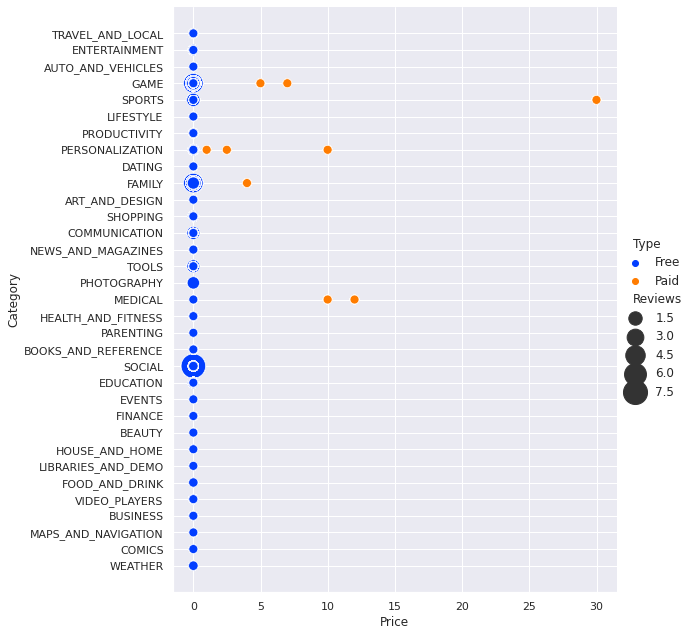

In [85]:
# Plotting relplot for visualizing statistical relationships between scatter plots and line plots.
sns.relplot(y="Category", x="Price", hue="Type", size="Reviews", sizes=(80, 600), alpha=1, palette="bright", height=9, data=merged_df)

## Price Vs Ratings plot delivers that Type of Apps is either PAID or FREE, Circle is larger if Reviews are more. **Social,** **Family,** **Game,** **Sports** Categories have highest number of reviews.

# 6 - Type vs Sentiment Polarity

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text major ticklabel objects>)

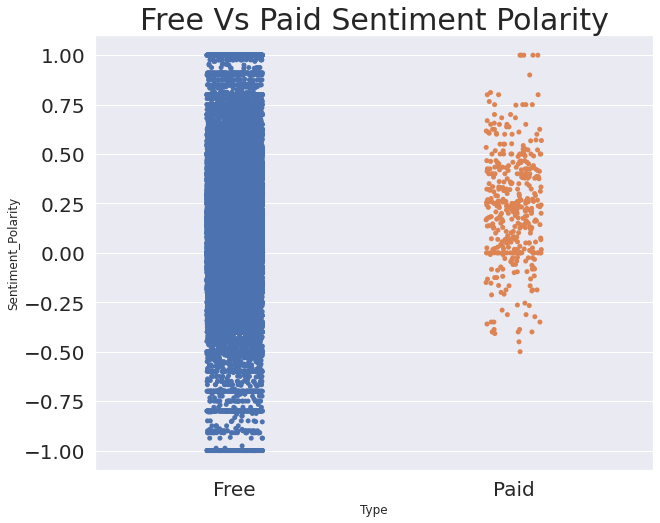

In [86]:
plt.figure(figsize=(10,8))
sns.stripplot(x=merged_df['Type'],y=merged_df['Sentiment_Polarity'],jitter=True)
plt.title('Free Vs Paid Sentiment Polarity',fontdict={'fontsize':30})
sns.set_style("whitegrid")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#Type vs Sentiment_Polarity graph clearly shows that **Paid Apps** are less likely to recieve bad reviews and **Free apps** have a more equal distribution of Setiment Polarity.


# 7 - Category vs Apps vs Sentiment

Text(0.5, 1.0, 'Types of Reviews for each Category')

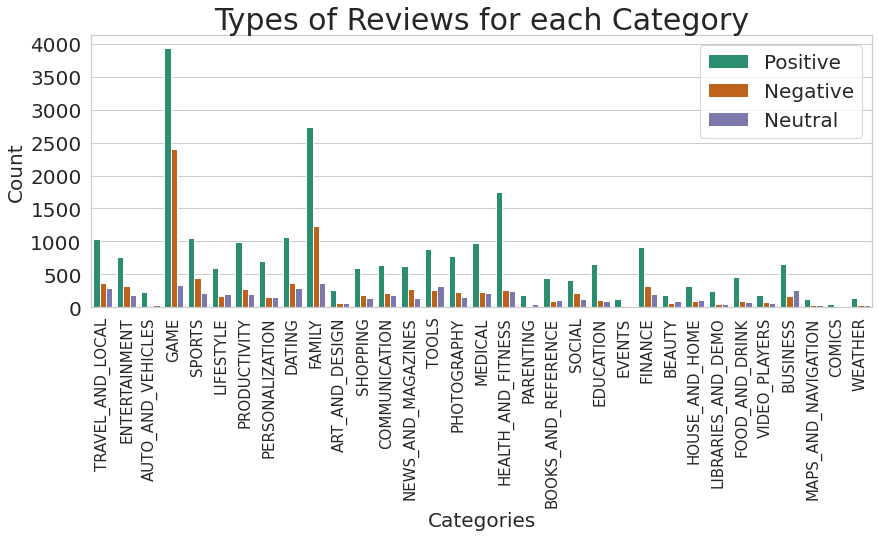

In [87]:
plt.figure(figsize=(14,5))
sns.countplot(x=merged_df['Category'],hue=merged_df['Sentiment'],orient='y',palette='Dark2')
plt.xticks(fontsize=15 , rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Categories', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.legend(prop={'size': 20})
plt.title('Types of Reviews for each Category',fontdict={'fontsize':30})

## **Game** Category appears to have the most Positive and Negative Reviews. Shows volatility of Game Category. **Health and Fitness** appears to have least Negative reviews in relation to its positive reviews.

# 8 - Finding the top 10 Installed Apps in Game Category

In [88]:
game_apps = merged_df[merged_df['Category']==('GAME')]
print('The dataset contains '+ (str((game_apps.App.nunique())))+ ' game apps.')

The dataset contains 93 game apps.


In [89]:
top_install_game=game_apps.groupby("App")["Installs"].sum().nlargest(10).index.tolist()
top_install_game

['Candy Crush Saga',
 'Angry Birds Classic',
 'Helix Jump',
 'Garena Free Fire',
 '8 Ball Pool',
 'Candy Crush Soda Saga',
 'Clash Royale',
 'Bowmasters',
 'Flow Free',
 'Agar.io']

### Defining the function to create the new column name as Top_Installed_game.  Top_Installed_game contains the **app names** and **Others**, function will print those app names which present in top_install_game otherwise it will print Others 

In [90]:
def fuc(row):
    if row["App"] not in top_install_game:
        return("Others")
    else:
        return row['App']
game_apps['Top_Installed_game']=game_apps.apply(fuc,axis=1)
game_apps.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Installs1,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Year,Top_Installed_game
206,Dream League Soccer 2018,GAME,4.6,9883806,74.0,100000000,Free,0.0,Everyone,Sports,2018-07-16,5.064,4.4 and up,"100,000,000+","Extremely addictive, good game pass time with....",Positive,0.075000,0.500000,2018,Others
210,Dream League Soccer 2018,GAME,4.6,9883806,74.0,100000000,Free,0.0,Everyone,Sports,2018-07-16,5.064,4.4 and up,"100,000,000+",I'm using oneplus 5 whenever I play game match...,Negative,-0.206250,0.406250,2018,Others
312,Dream League Soccer 2018,GAME,4.6,9883806,74.0,100000000,Free,0.0,Everyone,Sports,2018-07-16,5.064,4.4 and up,"100,000,000+",Great graphics really addictive fun play.But s...,Positive,0.129696,0.543122,2018,Others
1265,DEER HUNTER 2018,GAME,4.3,955656,82.0,10000000,Free,0.0,Teen,Action,2018-06-26,5.1.2,3.0 and up,"10,000,000+","The movement scope mode slow, thank you.",Negative,-0.300000,0.400000,2018,Others
1266,DEER HUNTER 2018,GAME,4.3,955656,82.0,10000000,Free,0.0,Teen,Action,2018-06-26,5.1.2,3.0 and up,"10,000,000+",I uninstall reinstall hunt game let back till ...,Negative,-0.200000,0.200000,2018,Others


In [91]:
top_install_game1=game_apps.groupby("Top_Installed_game")["Installs",'Category'].sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [92]:
top_install_game1

,Installs
Top_Installed_game,
8 Ball Pool,21900000000
Agar.io,13600000000
Angry Birds Classic,27300000000
Bowmasters,15600000000
Candy Crush Saga,120000000000
Candy Crush Soda Saga,16600000000
Clash Royale,16500000000
Flow Free,15400000000
Garena Free Fire,22200000000


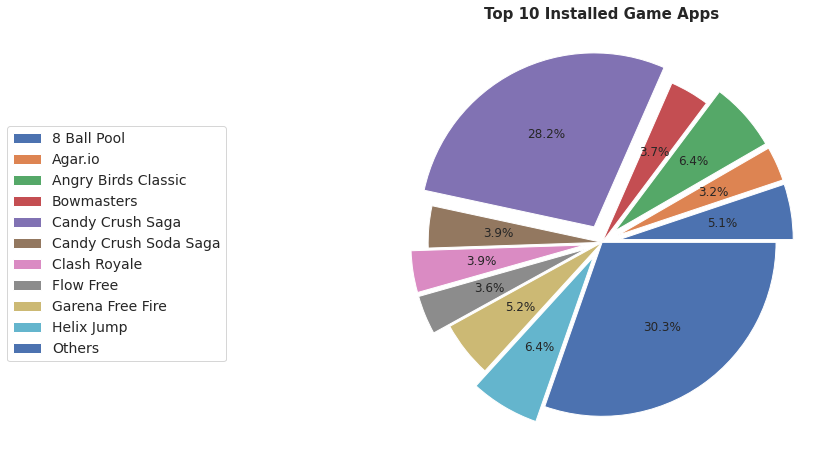

In [93]:

# Let us plot Pie chart for top 10 installed apps in Game Category
top_install_game=game_apps.groupby("Top_Installed_game")["Installs"].sum()
fig7, ax = plt.subplots(figsize = (10,8))
explode = (0.1,0.1,0.1,0,0.1,0,0.1,0.1,0,0.1,0)
labels=top_install_game.index
ax.set(facecolor = 'grey')
pie = plt.pie(top_install_game, explode= explode,startangle=0,autopct='%1.1f%%')
plt.legend(pie[0],labels, bbox_to_anchor=(0,0.5), loc="center right", fontsize=14, 
           bbox_transform=plt.gcf().transFigure,)
plt.title('Top 10 Installed Game Apps', fontsize = 15, fontweight='bold')
plt.show()

# Here we can conclude from graph that **Candy Crush Saga** Game have more number of downloads.

# 9 - Looking for Paid apps in Category 


In [94]:
# Grouping apps if apps are more than 200 in the data!
df1 = merged_df.groupby('Category').filter(lambda x: len(x) >= 200).reset_index()
df1 = df1.sort_values(by=['Category'])
df1.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Installs1,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Year
25941,46122,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1,100000,Free,0.0,Everyone,Art & Design,2018-03-21,1.03,4.0.3 and up,"100,000+",Awesome absolutely love,Positive,0.75,0.800,2018
331,843,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,"500,000+",This beautiful,Positive,0.85,1.000,2018
330,840,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,"500,000+",hate it.,Negative,-0.80,0.900,2018
329,839,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,"500,000+",It's ok,Positive,0.50,0.500,2018
328,838,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,"500,000+",Good great,Positive,0.75,0.675,2018


In [95]:
# Apps whose price is more than $20. 1% of the apps have price more than $20
paid_apps_df = df1[df1.Price>20]
paid_apps_df.shape

(40, 20)

## Relevant Apps

In [96]:
# We will define the relevant apps which has relation to Type and Price Column
Apps_Rel = df1[df1.Price<20]
Apps_Rel= Apps_Rel[['Category','Type','Price']]
Apps_Rel.head()

,Category,Type,Price
25941,ART_AND_DESIGN,Free,0.0
331,ART_AND_DESIGN,Free,0.0
330,ART_AND_DESIGN,Free,0.0
329,ART_AND_DESIGN,Free,0.0
328,ART_AND_DESIGN,Free,0.0


In [97]:
# Revealing the Category which has paid applications in a dataframe
PaidApps= Apps_Rel[Apps_Rel.Type=='Paid']   #Apps_Rel --> Apps Relvant!
PaidApps.Category.unique()

array(['FAMILY', 'GAME', 'MEDICAL', 'PERSONALIZATION'], dtype=object)

### Here we can see, there are total 4 Categories having paid applications.

In [98]:
# Let us create PaidApps dataframe to get mean over the price in Price column
PaidApps= PaidApps.groupby('Category').mean().reset_index()
PaidApps= PaidApps.sort_values('Price',ascending=False)
PaidApps.head()

,Category,Price
2,MEDICAL,11.028961
1,GAME,5.132857
3,PERSONALIZATION,4.837222
0,FAMILY,3.990000


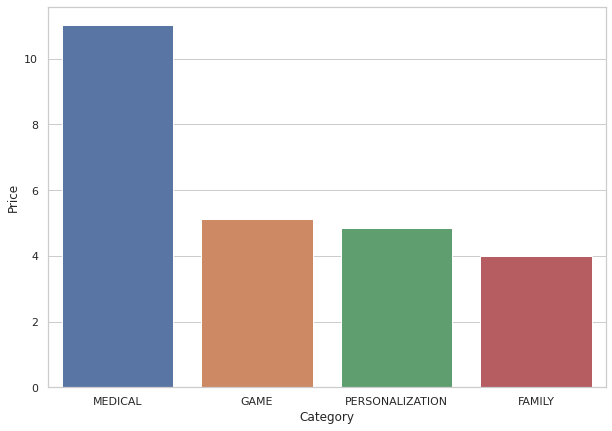

In [99]:
plt.figure(figsize=(10,7))
sns.barplot(data=PaidApps,x='Category',y='Price')

## We can see from above that **Medical** Category has more paid apps.


In [100]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Installs1,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Year
6,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+",I'm grateful booking engine dreamtrips. I've a...,Positive,0.2000,0.2000,2018
7,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+","This great app. I One book plane, hotel, dream...",Positive,0.8500,0.8750,2018
8,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+",Its slow rovia keeps going back disappointed g...,Negative,-0.1375,0.4125,2018
9,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+",Try get dreams trips Germany UK,Neutral,0.0000,0.0000,2018
10,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,"500,000+",I cant open travelbook samsung handphone,Neutral,0.0000,0.5000,2018


In [101]:
# Which free app is having highest installs and most number of reviews with rating greater than 4?